In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
print('Loading the dataset with the Minute and Second column added')
D1 = pd.read_csv("C:\\Users\\lenovo\\Desktop\\CCNY\\Adversarial AI\\D4_Second.csv")
D1.head()

Loading the dataset with the Minute and Second column added


,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Minute,Second
0,09:30:00.002130,236.28,100,Z,09:30:00.000093,570,34200
1,09:30:00.002130,236.29,100,K,09:30:00.000101,570,34200
2,09:30:00.002130,236.11,1,K,09:30:00.001527,570,34200
3,09:30:00.002141,236.17,20,K,09:30:00.001640,570,34200
4,09:30:00.002180,236.03,10,K,09:30:00.001714,570,34200


Seeing the variation of prices througout the day.


Text(0.5, 1.0, 'Variation of the Min-Max Price/Second')

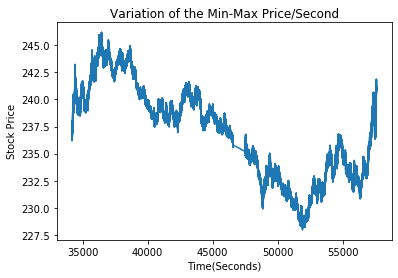

In [10]:
print('Seeing the variation of prices througout the day.')
g1 = (pd.concat([D1.groupby('Second').head(1), D1.groupby('Second').tail(1)])
   .drop_duplicates()
   .sort_values('Minute')
   .reset_index(drop=True))
plt.plot(g1['Second'],g1['PRICE'])
plt.xlabel('Time(Seconds)')
plt.ylabel('Stock Price')
plt.title('Variation of the Min-Max Price/Second')

In [61]:
print('We see the small flat line, indicating no trading.')
print('We know, for this day of trading the circuit breaker was triggered in the 777 minute. So lets analyse the minute before that.')

We see the small flat line, indicating no trading.
We know, for this day of trading the circuit breaker was triggered in the 777 minute. So lets analyse the minute before that.


                    Time   PRICE  SIZE EXCHANGE PARTICIPANT_TIME  Minute  \
1370114  12:56:00.010834  235.96   100        P  12:56:00.010699     776   
1370115  12:56:00.010843  235.67   100        P  12:56:00.010699     776   
1370116  12:56:00.013627  235.84   100        Y  12:56:00.013201     776   
1370117  12:56:00.029590  235.66   100        Y  12:56:00.029131     776   
1370118  12:56:00.038568  235.74   100        P  12:56:00.038443     776   
...                  ...     ...   ...      ...              ...     ...   
1372756  12:56:16.840520  235.76   100        P  12:56:16.840372     776   
1372757  12:56:16.840632  235.68     7        K  12:56:16.840225     776   
1372758  12:56:16.840647  235.73    16        Z  12:56:16.840227     776   
1372759  12:56:16.880668  235.57   100        P  12:56:16.880548     776   
1372760  12:56:16.880779  235.65   100        Z  12:56:16.880332     776   

         Second  
1370114   46560  
1370115   46560  
1370116   46560  
1370117   46560

Text(0.5, 1.0, 'Variation of stock price in the 776th minute')

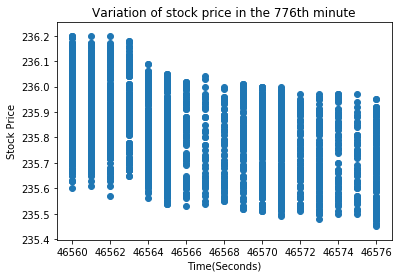

In [16]:
D1_1 = D1[D1['Minute'] == 776]
print(D1_1)
plt.scatter(D1_1['Second'],D1_1['PRICE'])
plt.xlabel('Time(Seconds)')
plt.ylabel('Stock Price')
plt.title('Variation of stock price in the 776th minute')

In [62]:
print('We see a drop in the price before the circuit breaker was triggered. Lets quantify at which rate the price is dropping.')

We see a drop in the price before the circuit breaker was triggered. Lets quantify at which rate the price is dropping.


In [19]:
D1_1['Total_Price'] = D1_1.apply(lambda x: x['PRICE']*x['SIZE'],axis=1)
D1_1

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Minute,Second,Total_Price
1370114,12:56:00.010834,235.96,100,P,12:56:00.010699,776,46560,23596.00
1370115,12:56:00.010843,235.67,100,P,12:56:00.010699,776,46560,23567.00
1370116,12:56:00.013627,235.84,100,Y,12:56:00.013201,776,46560,23584.00
1370117,12:56:00.029590,235.66,100,Y,12:56:00.029131,776,46560,23566.00
1370118,12:56:00.038568,235.74,100,P,12:56:00.038443,776,46560,23574.00
...,...,...,...,...,...,...,...,...
1372756,12:56:16.840520,235.76,100,P,12:56:16.840372,776,46576,23576.00
1372757,12:56:16.840632,235.68,7,K,12:56:16.840225,776,46576,1649.76
1372758,12:56:16.840647,235.73,16,Z,12:56:16.840227,776,46576,3771.68
1372759,12:56:16.880668,235.57,100,P,12:56:16.880548,776,46576,23557.00


Text(0.5, 1.0, 'Variation of Avg Stock Price in the 776th Minute')

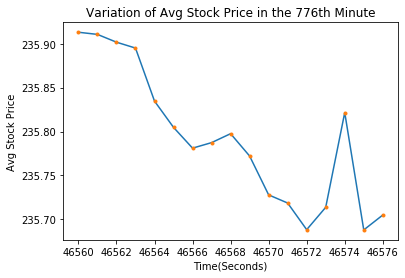

In [22]:
# computing the average price per second in the 776 minute
size_sum = np.asarray(D1_1.groupby('Second')['SIZE'].sum().tolist())
price_sum = np.asarray(D1_1.groupby('Second')['Total_Price'].sum().tolist())
avg_price = price_sum/size_sum
plt.plot(D1_1.Second.unique(),avg_price)
plt.plot(D1_1.Second.unique(),avg_price,'.')
plt.ylabel('Avg Stock Price')
plt.xlabel('Time(Seconds)')
plt.title('Variation of Avg Stock Price in the 776th Minute')

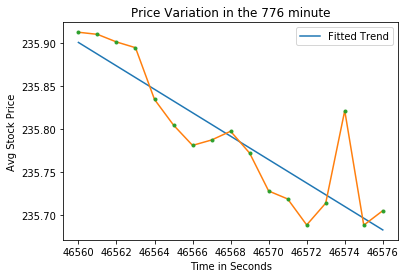

In [23]:
#using linear regression to quantify rate of change
y_train = np.asarray(avg_price)
x_train = np.asarray(D1_1.Second.unique())
model = LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)
plt.plot(D1_1.Second.unique(),model.predict(x_train.reshape(-1,1)), label = 'Fitted Trend')
plt.plot(D1_1.Second.unique(),avg_price)
plt.plot(D1_1.Second.unique(),avg_price,'.')
plt.xlabel('Time in Seconds')
plt.ylabel('Avg Stock Price')
plt.title('Price Variation in the 776 minute')
plt.legend()

In [24]:
print('Slope of drop:')
print(model.coef_)

Slope of drop:
[-0.01366935]


In [25]:
#calculating the slope of drop for each of the data
slope = []
for mint in D1.Minute.unique():
    d = D1[D1.Minute == mint]
    d['Total_Price'] = d.apply(lambda x: x['PRICE']*x['SIZE'],axis=1)
    size_sum = np.asarray(d.groupby('Second')['SIZE'].sum().tolist())
    price_sum = np.asarray(d.groupby('Second')['Total_Price'].sum().tolist())
    avg_price = price_sum/size_sum
    
    y_train = avg_price
    x_train = np.asarray(d.Second.unique())
    model = LinearRegression()
    model.fit(x_train.reshape(-1,1),y_train)
    slope.append(model.coef_)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [26]:
# adding the slope column to the original dataset
slope_np = np.asarray(slope[:][0])
minutes= D1['Minute'].unique()

new_slope=[]
for i in range(len(slope)):
	new_slope.append(slope[i][0])

new_slope = np.asarray(new_slope)
dataset = pd.DataFrame({'Minute': minutes, 'slopes': new_slope}, columns=['Minute', 'slopes'])
dataset.head()

,Minute,slopes
0,570,0.033870
1,571,0.034663
2,572,0.009879
3,573,0.040828
4,574,-0.024967


In [28]:
print('Rate of price drop calculated for every minute.')
new_df = D1.merge(dataset, how='left', on='Minute')
new_df

Rate of price drop calculated for every minute.


,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Minute,Second,slopes
0,09:30:00.002130,236.28,100,Z,09:30:00.000093,570,34200,0.03387
1,09:30:00.002130,236.29,100,K,09:30:00.000101,570,34200,0.03387
2,09:30:00.002130,236.11,1,K,09:30:00.001527,570,34200,0.03387
3,09:30:00.002141,236.17,20,K,09:30:00.001640,570,34200,0.03387
4,09:30:00.002180,236.03,10,K,09:30:00.001714,570,34200,0.03387
...,...,...,...,...,...,...,...,...
2803897,16:00:00.275485,241.43,600,T,16:00:00.274876,960,57600,0.00000
2803898,16:00:00.275499,241.17,610,T,16:00:00.274878,960,57600,0.00000
2803899,16:00:00.275518,241.25,1090,T,16:00:00.274878,960,57600,0.00000
2803900,16:00:00.275534,241.27,10,T,16:00:00.274882,960,57600,0.00000


In [33]:
print('The rate of price for the minute prior to the circuit breaker is -0.01366935. ')
print('Lets use this value to develop a range for our model.')
print('All values lying in the +/-1% range of this value should be classified as leading to a circuit breaker.')

def modelTrigger(slope):
    if((slope>= -0.01366935+(-0.01366935*0.01)) & (slope <= -0.01366935-(-0.01366935*0.01))):
        return 1
    return 0

The rate of price for the minute prior to the circuit breaker is -0.01366935. 
Lets use this value to develop a range for our model.
All values lying in the +/-1% range of this value should be classified as leading to a circuit breaker.


In [34]:
new_df['Trigger'] = new_df.apply(lambda x: modelTrigger(x['slopes']),axis=1)
new_df

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Minute,Second,slopes,Trigger
0,09:30:00.002130,236.28,100,Z,09:30:00.000093,570,34200,0.03387,0
1,09:30:00.002130,236.29,100,K,09:30:00.000101,570,34200,0.03387,0
2,09:30:00.002130,236.11,1,K,09:30:00.001527,570,34200,0.03387,0
3,09:30:00.002141,236.17,20,K,09:30:00.001640,570,34200,0.03387,0
4,09:30:00.002180,236.03,10,K,09:30:00.001714,570,34200,0.03387,0
...,...,...,...,...,...,...,...,...,...
2803897,16:00:00.275485,241.43,600,T,16:00:00.274876,960,57600,0.00000,0
2803898,16:00:00.275499,241.17,610,T,16:00:00.274878,960,57600,0.00000,0
2803899,16:00:00.275518,241.25,1090,T,16:00:00.274878,960,57600,0.00000,0
2803900,16:00:00.275534,241.27,10,T,16:00:00.274882,960,57600,0.00000,0


In [37]:
print('The predicted minutes based on the above model when the circuit breaker can possibly be triggered are:')
print(new_df[new_df['Trigger']==1].Minute.unique())

The predicted minutes based on the above model when the circuit breaker can possibly be triggered are:
[776 794 946]


In [40]:
print('Lets analyse some more data with circuit breaker events, March 9 2020.')

Lets analyse some more data with circuit breaker events, March 9 2020.


In [39]:
D2 = pd.read_csv("C:\\Users\\lenovo\\Desktop\\CCNY\\Adversarial AI\\March9_corrected_Second.csv")
D2.head()

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Second,Minute
0,09:30:00.023733,275.15,100,C,09:30:00.023584,34200,570
1,09:30:00.026909,275.55,100,X,09:30:00.026331,34200,570
2,09:30:00.027220,275.51,100,Z,09:30:00.026787,34200,570
3,09:30:00.027242,275.43,100,N,09:30:00.027119,34200,570
4,09:30:00.031943,275.06,100,K,09:30:00.031519,34200,570


In [41]:
#trying to identify when the circuit breaker was triggered precisely
M = D2.groupby(['Minute']).mean()
M = M.reindex(list(range(M.index.min(),M.index.max()+1)),fill_value=0)
M

,PRICE,SIZE,Second
Minute,,,
570,275.646763,200.104745,34225.286210
571,275.954634,90.844419,34288.823118
572,276.543325,103.327699,34347.311277
573,276.450122,113.374649,34409.221001
574,276.389665,104.375304,34445.645985
...,...,...,...
956,276.860220,151.542724,57389.354123
957,276.095040,136.458114,57447.972912
958,275.709186,146.426661,57509.525450


In [42]:
M[M['SIZE']==0]

,PRICE,SIZE,Second
Minute,,,
575,0.0,0.0,0.0
576,0.0,0.0,0.0
577,0.0,0.0,0.0
578,0.0,0.0,0.0
579,0.0,0.0,0.0
580,0.0,0.0,0.0
581,0.0,0.0,0.0
582,0.0,0.0,0.0
583,0.0,0.0,0.0


In [51]:
print('Therefore, the circuit breaker on this day was triggered at the 575th Minute. Lets calculate the rate of price drop for the 574th minute.')

Therefore, the circuit breaker on this day was triggered at the 575th Minute. Lets calculate the rate of price drop for the 574th minute.


In [44]:
D2_2 = D2[D2['Minute'] == 574]
D2_2['Total_Price'] = D2_2.apply(lambda x: x['PRICE']*x['SIZE'],axis=1)
D2_2

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Second,Minute,Total_Price
42648,09:34:00.004904,276.27,200,T,09:34:00.004357,34440,574,55254.00
42649,09:34:00.004913,276.62,100,T,09:34:00.004357,34440,574,27662.00
42650,09:34:00.013996,276.75,90,Y,09:34:00.013573,34440,574,24907.50
42651,09:34:00.022602,276.43,9,Z,09:34:00.022162,34440,574,2487.87
42652,09:34:00.023704,276.32,100,D,09:34:00.021000,34440,574,27632.00
...,...,...,...,...,...,...,...,...
44287,09:34:13.067560,276.33,200,P,09:34:13.067460,34453,574,55266.00
44288,09:34:13.070619,276.10,100,P,09:34:13.070515,34453,574,27610.00
44289,09:34:13.070626,276.58,100,P,09:34:13.070515,34453,574,27658.00
44290,09:34:13.072668,276.52,100,P,09:34:13.072562,34453,574,27652.00


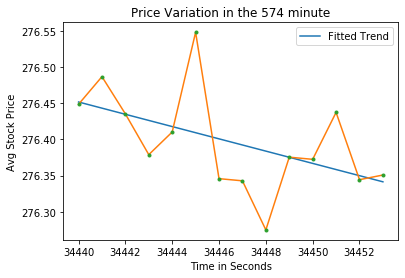

In [45]:
size_sum = np.asarray(D2_2.groupby('Second')['SIZE'].sum().tolist())
price_sum = np.asarray(D2_2.groupby('Second')['Total_Price'].sum().tolist())
avg_price = price_sum/size_sum
    
y_train = avg_price
x_train = np.asarray(D2_2.Second.unique())
model = LinearRegression()
model.fit(x_train.reshape(-1,1),y_train)
plt.plot(D2_2.Second.unique(),model.predict(x_train.reshape(-1,1)), label = 'Fitted Trend')
plt.plot(D2_2.Second.unique(),avg_price)
plt.plot(D2_2.Second.unique(),avg_price,'.')
plt.xlabel('Time in Seconds')
plt.ylabel('Avg Stock Price')
plt.title('Price Variation in the 574 minute')
plt.legend()

In [46]:
print('Slope of drop:')
print(model.coef_)

Slope of drop:
[-0.00848]


In [54]:
print('This model will also include the rate of price drop from the March 9 data as well.')
def modelTrigger(slope):
    if((slope<= -0.00848) & (slope >= -0.01366935)):
        return 1
    return 0

This model will also include the rate of price drop from the March 9 data as well.


In [50]:
new_df['Trigger'] = new_df.apply(lambda x: modelTrigger(x['slopes']),axis=1)

In [53]:
print('The predicted minutes based on the above model when the circuit breaker can possibly be triggered for the original data are:')
print(new_df[new_df['Trigger']==1].Minute.unique())

The predicted minutes based on the above model when the circuit breaker can possibly be triggered for the original data are:
[575 583 596 599 623 632 633 635 644 671 686 696 717 721 724 736 750 755
 757 760 765 768 772 776 803 807 811 820 823 838 848 852 857 864 866 881
 886 888 934 935 956]


In [60]:
print('Based on the two values of slope we have got after analysing two different days of data, we are presented with a broader range.')
print('Due to this we have more values of triggers included in our prediction and a higher false positivity rate compared to our '
      '\nprevious model.')
print('Therefor we would require to analyse more data and develop an even more accurate model.')

Based on the two values of slope we have got after analysing two different days of data, we are presented with a broader range.
Due to this we have more values of triggers included in our prediction and a higher false positivity rate compared to our 
previous model.
Therefor we would require to analyse more data and develop an even more accurate model.
